In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [65]:
#using pandas reading both datas...
train_data=pd.read_csv("C:/Users/91979/OneDrive/Documents/jobthon/train.csv")

In [66]:
train_data.head()

,row_id,user_id,category_id,video_id,age,gender,profession,followers,views,engagement_score
0,1,19990,37,128,24,Male,Student,180,1000,4.33
1,2,5304,32,132,14,Female,Student,330,714,1.79
2,3,1840,12,24,19,Male,Student,180,138,4.35
3,4,12597,23,112,19,Male,Student,220,613,3.77
4,5,13626,23,112,27,Male,Working Professional,220,613,3.13


In [67]:
train_new=pd.get_dummies(train_data, columns=['gender','profession'],drop_first=True) #assign dummy variables for categorical varibles

In [68]:
train_new

,row_id,user_id,category_id,video_id,age,followers,views,engagement_score,gender_Male,profession_Student,profession_Working Professional
0,1,19990,37,128,24,180,1000,4.33,1,1,0
1,2,5304,32,132,14,330,714,1.79,0,1,0
2,3,1840,12,24,19,180,138,4.35,1,1,0
3,4,12597,23,112,19,220,613,3.77,1,1,0
4,5,13626,23,112,27,220,613,3.13,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
89192,89193,23996,15,32,25,340,662,3.91,1,0,0
89193,89194,20466,20,47,31,240,892,3.56,1,0,0
89194,89195,13655,16,97,25,270,462,4.23,1,1,0
89195,89196,24840,9,18,35,230,819,3.77,1,0,1


In [69]:
test_data=pd.read_csv("C:/Users/91979/OneDrive/Documents/jobthon/test.csv")

In [70]:
test_data.head()

,row_id,user_id,category_id,video_id,age,gender,profession,followers,views
0,89198,7986,12,42,14,Male,Student,180,138
1,89199,11278,34,115,14,Male,Student,230,840
2,89200,17245,8,110,44,Female,Working Professional,280,628
3,89201,9851,16,137,18,Male,Student,270,462
4,89202,16008,34,96,47,Female,Other,230,840


In [71]:
test_new=pd.get_dummies(test_data, columns=['gender','profession'],drop_first=True)

In [72]:
test_new.head()

,row_id,user_id,category_id,video_id,age,followers,views,gender_Male,profession_Student,profession_Working Professional
0,89198,7986,12,42,14,180,138,1,1,0
1,89199,11278,34,115,14,230,840,1,1,0
2,89200,17245,8,110,44,280,628,0,0,1
3,89201,9851,16,137,18,270,462,1,1,0
4,89202,16008,34,96,47,230,840,0,0,0


In [73]:
train_final=train_new.drop('row_id', axis=1)

In [74]:
train_final.head()

,user_id,category_id,video_id,age,followers,views,engagement_score,gender_Male,profession_Student,profession_Working Professional
0,19990,37,128,24,180,1000,4.33,1,1,0
1,5304,32,132,14,330,714,1.79,0,1,0
2,1840,12,24,19,180,138,4.35,1,1,0
3,12597,23,112,19,220,613,3.77,1,1,0
4,13626,23,112,27,220,613,3.13,1,0,1


In [75]:
test_final=test_new.drop('row_id', axis=1)

In [76]:
test_final.head()

,user_id,category_id,video_id,age,followers,views,gender_Male,profession_Student,profession_Working Professional
0,7986,12,42,14,180,138,1,1,0
1,11278,34,115,14,230,840,1,1,0
2,17245,8,110,44,280,628,0,0,1
3,9851,16,137,18,270,462,1,1,0
4,16008,34,96,47,230,840,0,0,0


In [77]:
train_final.head()

,user_id,category_id,video_id,age,followers,views,engagement_score,gender_Male,profession_Student,profession_Working Professional
0,19990,37,128,24,180,1000,4.33,1,1,0
1,5304,32,132,14,330,714,1.79,0,1,0
2,1840,12,24,19,180,138,4.35,1,1,0
3,12597,23,112,19,220,613,3.77,1,1,0
4,13626,23,112,27,220,613,3.13,1,0,1


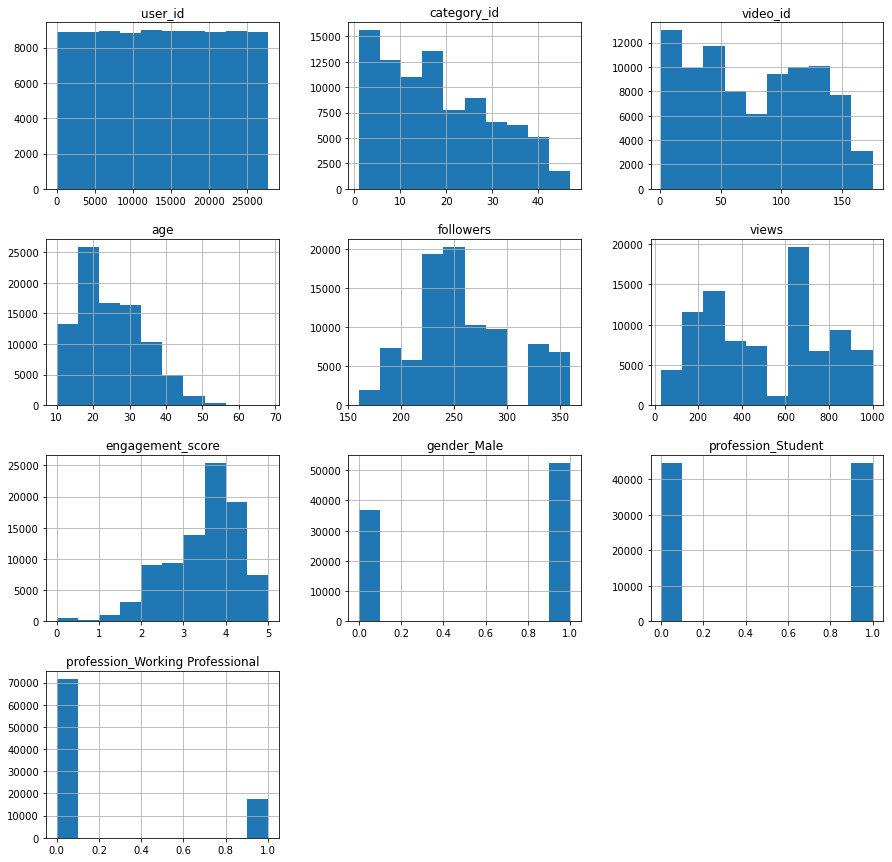

In [78]:
train_final.hist(figsize=(15,15))
plt.show()                #quick view using hist plot

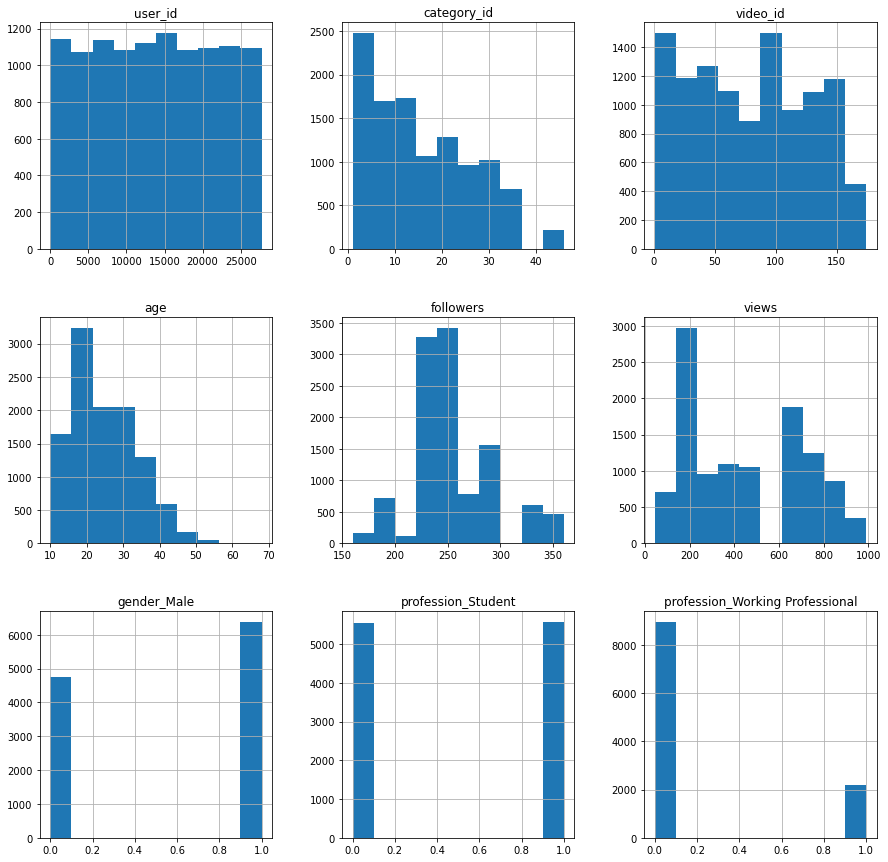

In [79]:
test_final.hist(figsize=(15,15))
plt.show()

In [80]:
#spliting data into x & y
x = train_final.drop('engagement_score', axis=1)
y = train_final['engagement_score']

In [136]:
#importing spliting library from sklearn library
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=3,test_size=0.3,shuffle=True)

In [152]:
!pip install xgboost     #installing xgboost


In [153]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error


In [154]:
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

In [156]:
xg_reg.fit(x_train,y_train) #fiting model

[15:08:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.3, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.1, max_delta_step=0,
             max_depth=5, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=10, n_jobs=4,
             num_parallel_tree=1, objective='reg:linear', predictor='auto',
             random_state=0, reg_alpha=10, reg_lambda=1, scale_pos_weight=1,
             subsample=1, tree_method='exact', validate_parameters=1,
             verbosity=None)

In [165]:
preds = xg_reg.predict(x_test)

In [166]:
preds

array([2.3880553, 2.6420937, 2.6709654, ..., 2.5022023, 2.6214693,
       2.468721 ], dtype=float32)

In [167]:
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 1.316817


In [168]:
data_dmatrix = xgb.DMatrix(data=x,label=y)

In [169]:
params = {"objective":"reg:linear",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)

[15:38:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[15:38:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[15:38:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.


In [170]:
cv_results

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,2.818775,0.000874,2.818780,0.001861
1,2.561923,0.001097,2.561960,0.001556
2,2.332426,0.000991,2.332514,0.002546
3,2.128722,0.001333,2.128879,0.002408
4,1.946772,0.003581,1.947000,0.002898
5,1.785849,0.003385,1.786143,0.002516
6,1.643912,0.003792,1.644220,0.002998
7,1.519000,0.003956,1.519389,0.002943
8,1.406495,0.003985,1.406635,0.002079
9,1.310727,0.004548,1.310858,0.002603


In [186]:
preds = xg_reg.predict(test_final)

In [187]:
preds

array([2.6232672, 2.569758 , 2.209425 , ..., 2.6065795, 2.4353304,
       2.3442123], dtype=float32)

In [196]:
 row_id= test_data['row_id']
submission = pd.DataFrame({
                  "row_id": row_id, 
                  "engaement_score": preds})

In [197]:
submission.to_csv('submission', index=False)